## Zadanie 1

Proszę pobrać plik medicine.txt, zawierający wyniki analizy nowego leku. W dwóch pierwszych kolumnach znajduje się stężenie dwóch składników w próbce krwi, w trzeciej - informacja o tym, czy lek zadziałał. Dane nie są znormalizowane. Proszę znormalizować dane, podzielić je na zbiór uczący i testujący w proporcjach 80-20 (należy pamiętać o proporcjach klas), zaproponować wielowarstwową sieć neuronową i zbadać jej skuteczność dla różnych ilości warstw i neuronów w tych warstwach. Proszę narysować w jaki sposób sieć dokonała podziału w zbiorze dla kilku sieci (zarówno tych z dobrymi, jak i złymi wynikami) oraz jak wygląda poprawny podział zbioru. Proszę również przedstawić wyniki dla 5-8 różnych struktur sieci, wraz z oceną, która z nich najlepiej poradziła sobie z zadaniem klasyfikacji

Architecture (5,) -> Accuracy: 0.863
Architecture (10,) -> Accuracy: 0.8704
Architecture (10, 5) -> Accuracy: 0.9
Architecture (50,) -> Accuracy: 0.8926
Architecture (20, 10, 5) -> Accuracy: 0.8963
Architecture (50, 30, 20, 10) -> Accuracy: 0.9
Architecture (100,) -> Accuracy: 0.8852
Architecture (50, 25) -> Accuracy: 0.9074

Best network: (50, 25), with accuracy: 0.9074
Best network: (5,), with accuracy: 0.863


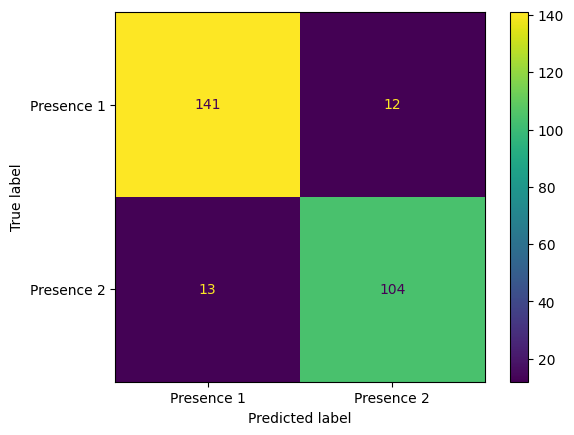

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# load data
medicine_data = pd.read_csv(os.path.join("data", "medicine.txt"))
X, y = (
    medicine_data.drop("Was medicine effective?", axis=1),
    medicine_data["Was medicine effective?"],
)

# print(medicine_data.describe())


# find outliers -> 3-sigma rule
def find_and_remove_outliers(X, y):
    n_cols, n_rows = X.shape

    feature_means = X.mean()
    feature_stdevs = X.std()

    outlier_mask = ((X < feature_means - 3 * feature_stdevs) | (X > feature_means + 3 * feature_stdevs)).any(axis=1)

    X_cleaned = X[~outlier_mask]
    y_cleaned = y[~outlier_mask]

    return X_cleaned, y_cleaned


def scale_data(X, y):
    scaler = StandardScaler()
    return scaler.fit_transform(X, y)


def prepare_data(X, y, train_size=0.8):
    X, y = find_and_remove_outliers(X, y)
    X = scale_data(X, y)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=train_size, stratify=y
    )

    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = prepare_data(X, y)

# no sense in testing networks, where no of neurons increase in futher layers
architectures = [
    (5,),
    (10,),
    (10, 5),
    (50,),
    (20, 10, 5),
    (50, 30, 20, 10),
    (100,),
    (50, 25),
]

results = {}

for arch in architectures:
    mlp = MLPClassifier(hidden_layer_sizes=arch, max_iter=2000)
    mlp.fit(X_train, y_train)
    
    y_pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    results[arch] = accuracy
    print(f"Architecture {arch} -> Accuracy: {accuracy:.4}")

best_arch = max(results, key=results.get)
worst_arch = min(results, key=results.get)

print(f'\nBest network: {best_arch}, with accuracy: {results[best_arch]:.4}')
print(f'Best network: {worst_arch}, with accuracy: {results[worst_arch]:.4}')

# conf matrix for the best network
best_mlp = MLPClassifier(hidden_layer_sizes=best_arch, max_iter=1000, random_state=42)
best_mlp.fit(X_train, y_train)
y_pred_best = best_mlp.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=X)
disp.plot()
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title(f'Confusion Matrix for Best Network {best_arch}')
# plt.show()